In [47]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 

In [12]:
data = pd.read_csv('D:/VIIT/ML/Task3/housing.csv')

### Understanding Data

In [5]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
data.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [8]:
data.shape

(20640, 10)

##### It has 20630 entries and 10 columns 

In [13]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# let's add few more categories to make our model more accurate 
- rooms_per_household = total_rooms / households
- bedrooms_per_room = total_bedrooms / total_rooms
- population_per_household = population / households

In [17]:
data['rooms_per_household'] = data['total_rooms']/ data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/ data['total_rooms']
data['population_per_household'] = data['population']/ data['households']

In [30]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   rooms_per_household  bedrooms_per_room  population_per_household  
0             6.984127           0.146591                  2.555556  
1             6.238137           0.155797                  2.109842  
2             8.288136           0.129516                  2.802260  
3             5.817352           0.184458                  2.547945  
4             6.281853           0.172096                  2.181467

In [24]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  rooms_per_household  bedrooms_per_room  \
count        20640.000000         20640.000000       20433.000000   
mean        206855.816909             5.429000           0.213039   
std         115395.615874             2.474173           0.057983   
min          14999.000000             0.846154           0.100000   
25%         119600.000000             4.440716           0.175427   
50%         179700.000000             5.229129           0.203162   
75%         264725.000000             6.052381           0.239821   
max         500001.000000           141.909091           1.000000   

       population_per_household  
count              20640.000000  
mean                   3.070655  
std                   10.386050  
min                    0.692308  
25%                    2.429741  
50%                    2.818116  
75%                    3.282261  
max                 1243.333333

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


###### we can see that there are some missing values in total_bedrooms and bedrooms_per_room

In [19]:
# checking for unique values 
data.nunique()

longitude                     844
latitude                      862
housing_median_age             52
total_rooms                  5926
total_bedrooms               1923
population                   3888
households                   1815
median_income               12928
median_house_value           3842
ocean_proximity                 5
rooms_per_household         19392
bedrooms_per_room           19268
population_per_household    18841
dtype: int64

In [20]:
#checking what 5 unique values in 'ocean_proximity'
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

 ### we will now clean our data
 checking for null values 

In [22]:
data.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [86]:
X = data.iloc[:, [0,1,2,3,4,5,6,7,9,10,11,12]].values
print(x)

[[-122.23 37.88 41.0 ... 6.984126984126984 0.14659090909090908
  2.5555555555555554]
 [-122.22 37.86 21.0 ... 6.238137082601054 0.15579659106916466
  2.109841827768014]
 [-122.24 37.85 52.0 ... 8.288135593220339 0.12951601908657123
  2.8022598870056497]
 ...
 [-121.22 39.43 17.0 ... 5.20554272517321 0.21517302573203195
  2.325635103926097]
 [-121.32 39.43 18.0 ... 5.329512893982808 0.21989247311827956
  2.1232091690544412]
 [-121.24 39.37 16.0 ... 5.254716981132075 0.22118491921005387
  2.616981132075472]]


In [87]:
y = data.iloc[:, [8]]
print(y)

       median_house_value
0                452600.0
1                358500.0
2                352100.0
3                341300.0
4                342200.0
...                   ...
20635             78100.0
20636             77100.0
20637             92300.0
20638             84700.0
20639             89400.0

[20640 rows x 1 columns]


##### We have null values in 'total bedroom' and 'bedrooms per room'
We can ignore those values or we can replace them with mean value. For accuracy we will be replacing null values with mean 

In [88]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')  
imputer.fit(X[:, [4,11]])
X[:, [4,11]] = imputer.transform(X[:, [4,11]])

In [89]:
print(X)

[[-122.23 37.88 41.0 ... 6.984126984126984 0.14659090909090908
  2.5555555555555554]
 [-122.22 37.86 21.0 ... 6.238137082601054 0.15579659106916466
  2.109841827768014]
 [-122.24 37.85 52.0 ... 8.288135593220339 0.12951601908657123
  2.8022598870056497]
 ...
 [-121.22 39.43 17.0 ... 5.20554272517321 0.21517302573203195
  2.325635103926097]
 [-121.32 39.43 18.0 ... 5.329512893982808 0.21989247311827956
  2.1232091690544412]
 [-121.24 39.37 16.0 ... 5.254716981132075 0.22118491921005387
  2.616981132075472]]


In [40]:
print(y)

       median_house_value
0                452600.0
1                358500.0
2                352100.0
3                341300.0
4                342200.0
...                   ...
20635             78100.0
20636             77100.0
20637             92300.0
20638             84700.0
20639             89400.0

[20640 rows x 1 columns]


# Relationship analysis

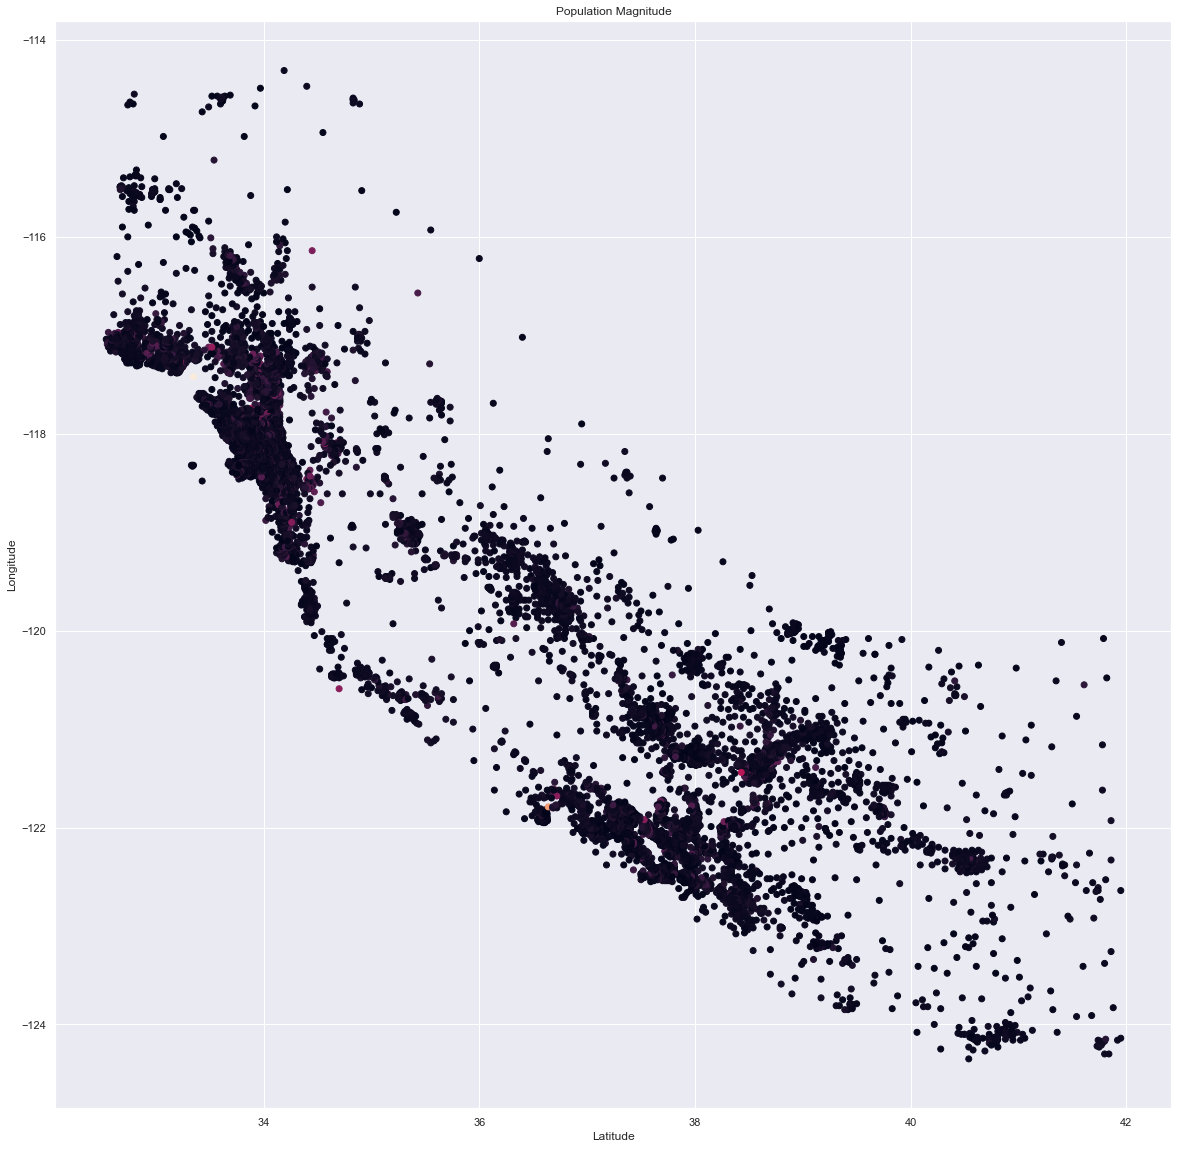

In [79]:
plt.pyplot.scatter(data['latitude'],data['longitude'],c=data['population'])
plt.pyplot.title('Population Magnitude')
plt.pyplot.xlabel('Latitude')
plt.pyplot.ylabel('Longitude')
plt.pyplot.show()

## Corelation matrix 


In [41]:
corelation = data.corr() 

<AxesSubplot:>

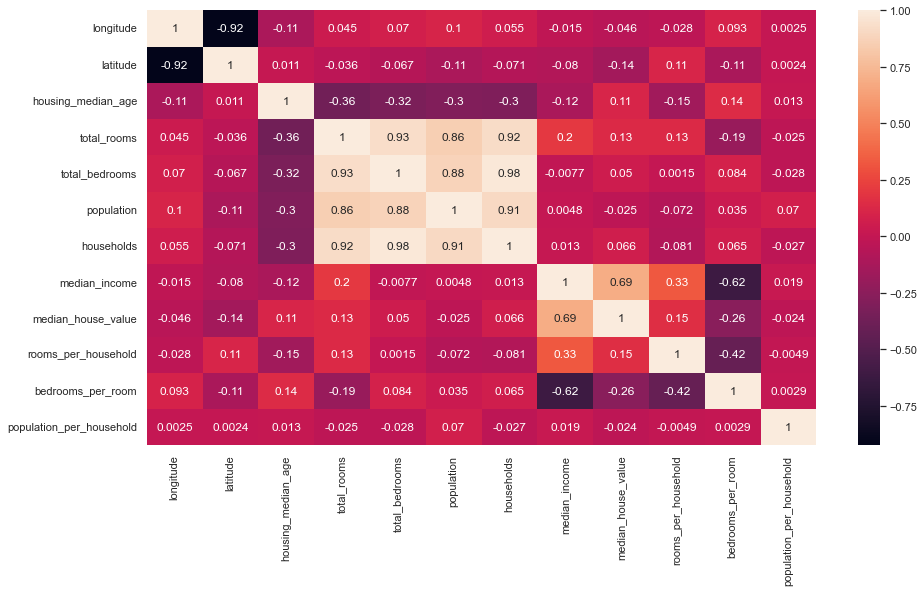

In [52]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

## Pair plots

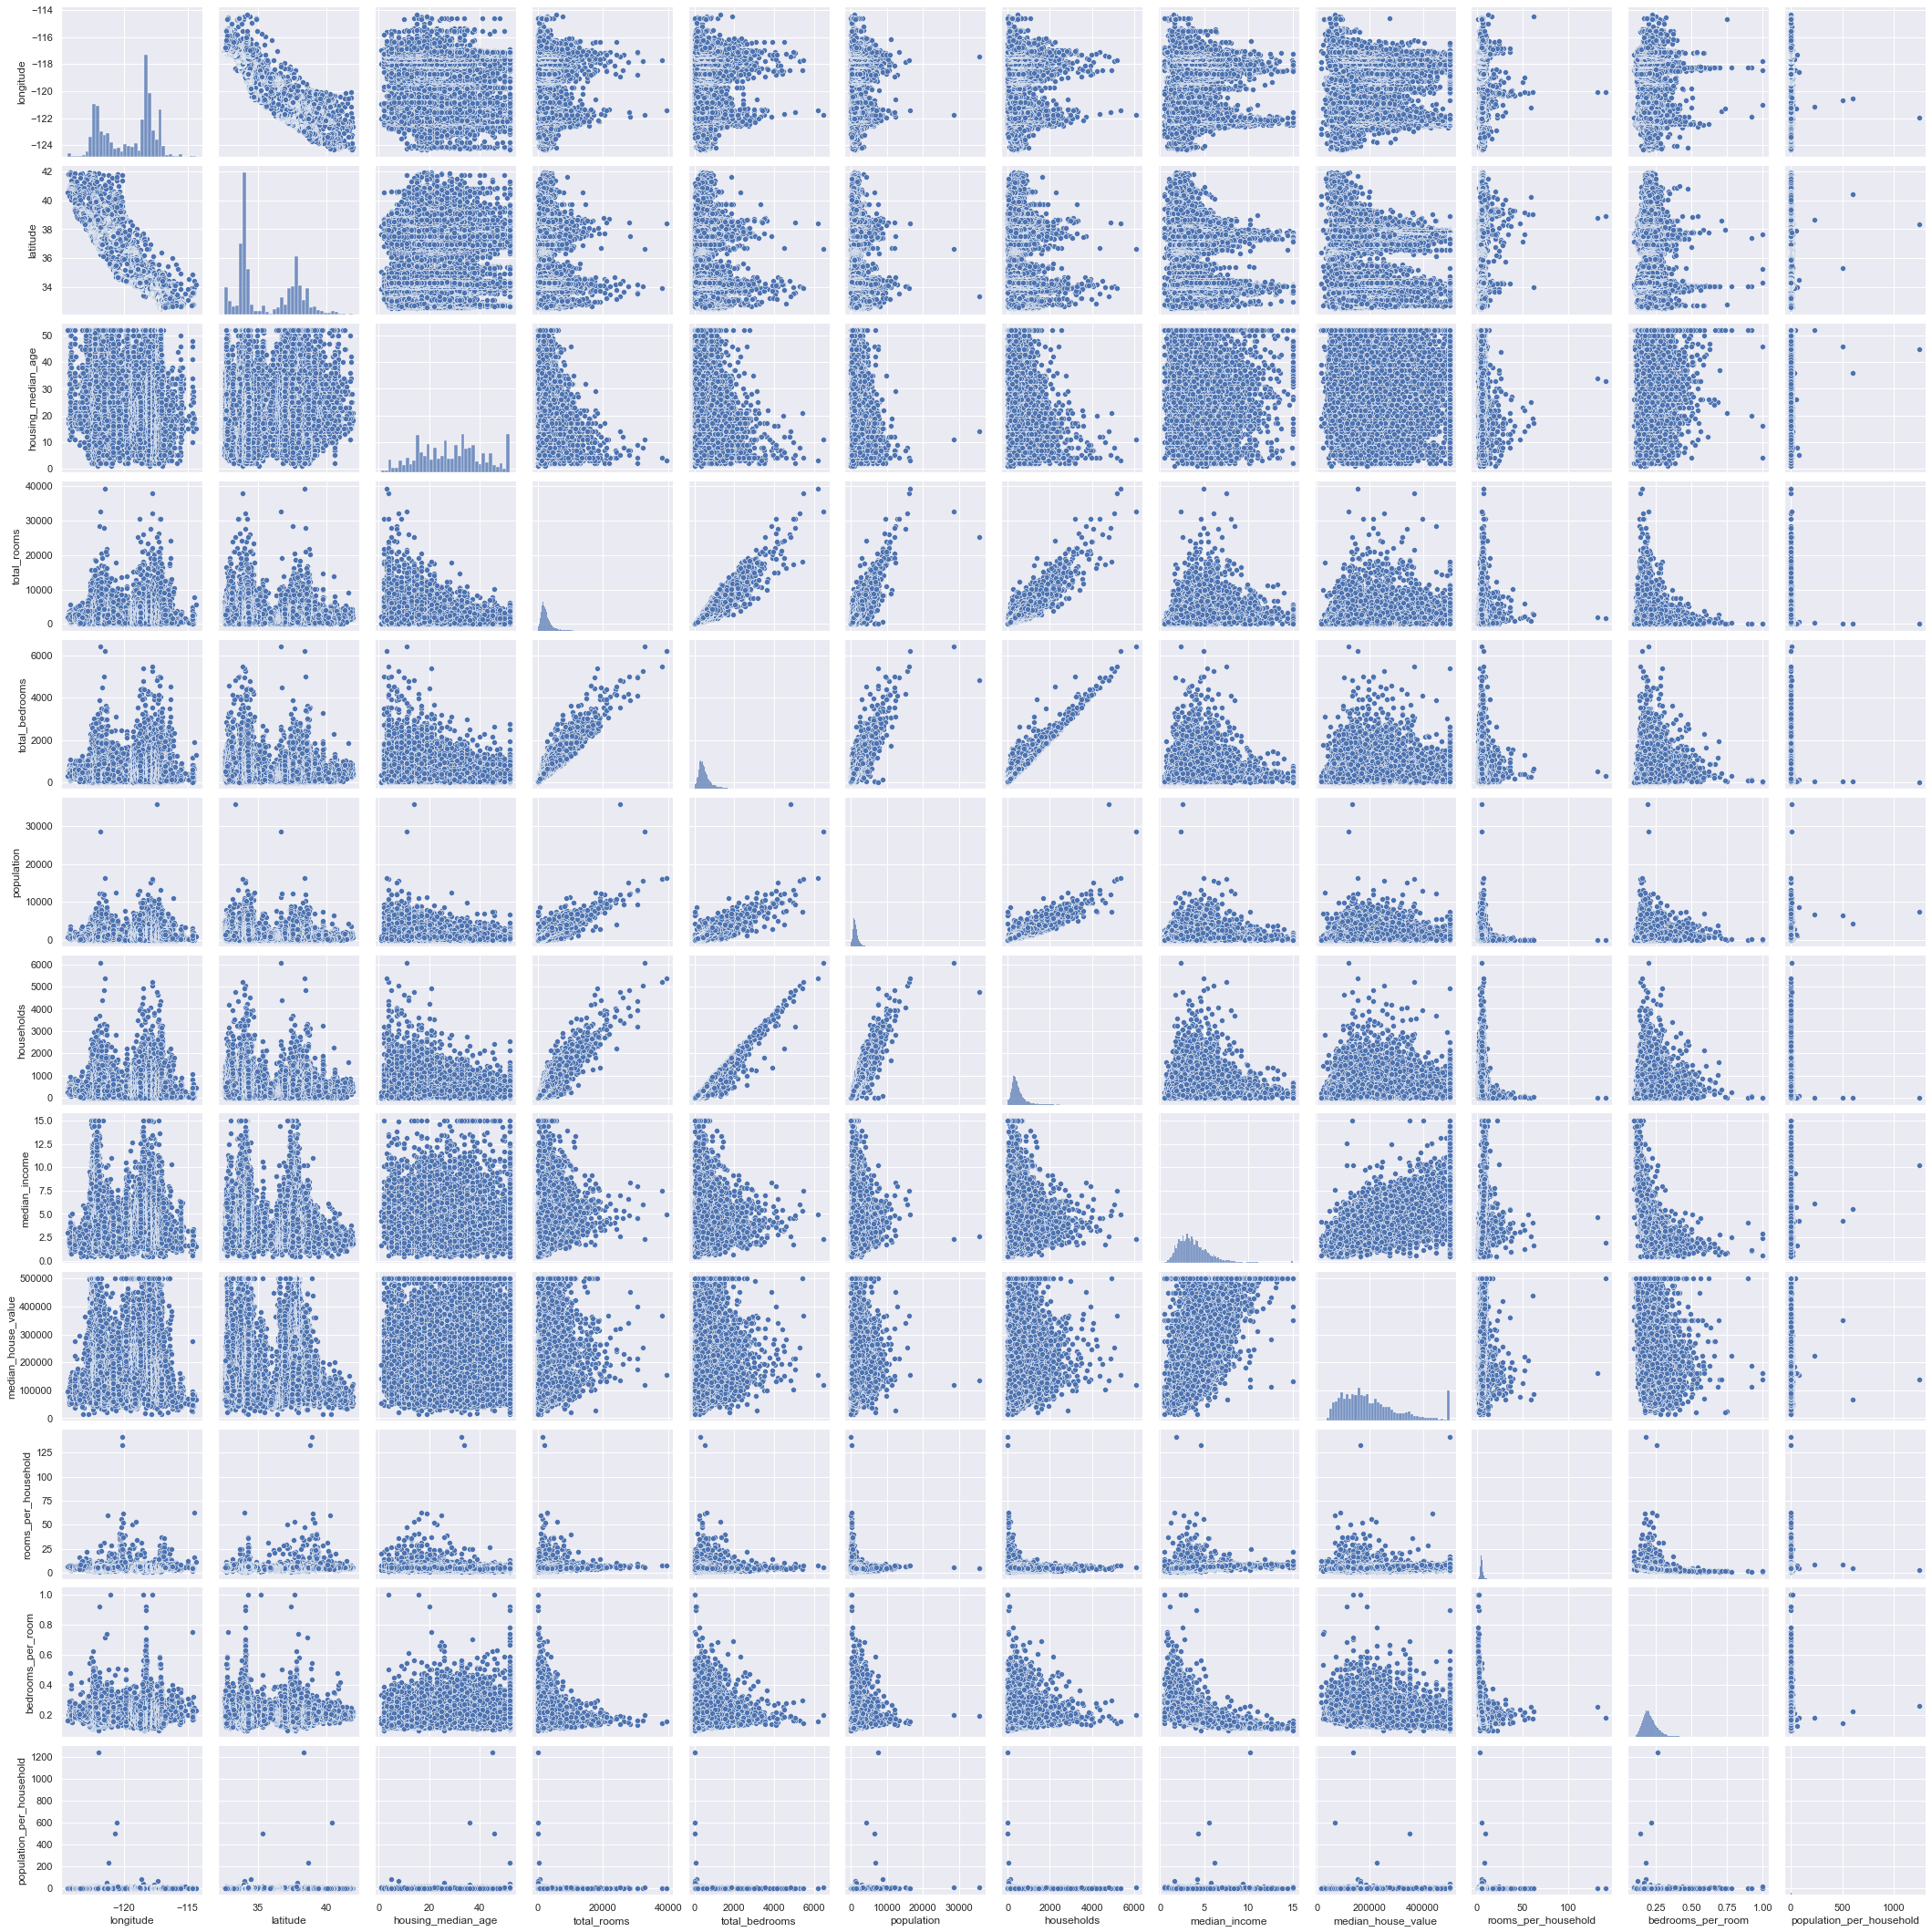

In [60]:

sns.pairplot(data)

## Scatter Plots 

### Longitude 

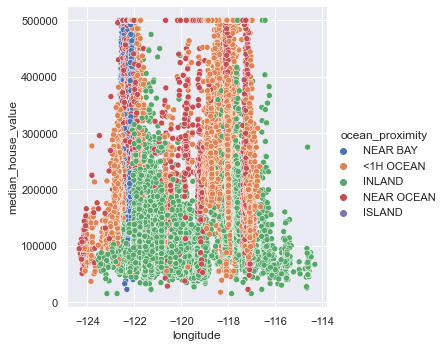

In [133]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.relplot(x = 'longitude', y = 'median_house_value', hue = 'ocean_proximity', data = data)

### Latitude 

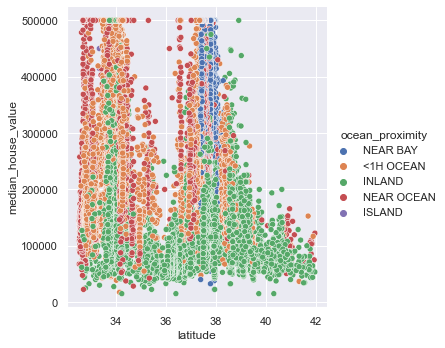

In [134]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.relplot(x = 'latitude', y = 'median_house_value', hue = 'ocean_proximity', data = data)

### Housing Median Age

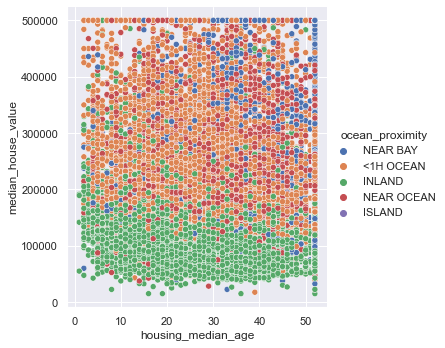

In [135]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.relplot(x = 'housing_median_age', y = 'median_house_value', hue = 'ocean_proximity', data = data)

### total_rooms

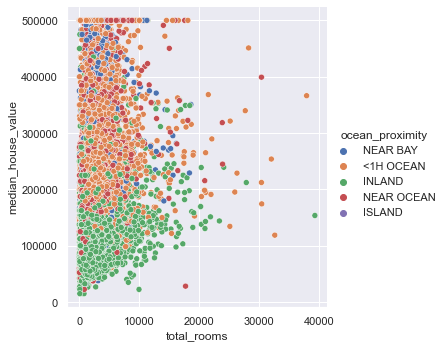

In [136]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.relplot(x = 'total_rooms', y = 'median_house_value', hue = 'ocean_proximity', data = data)

### total_bedrooms

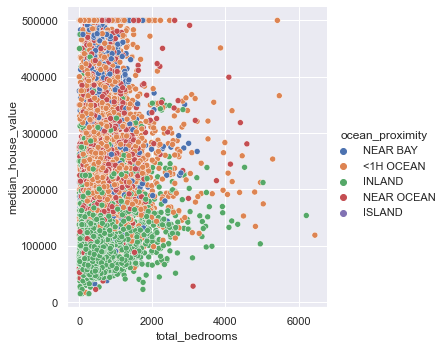

In [137]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.relplot(x = 'total_bedrooms', y = 'median_house_value', hue = 'ocean_proximity', data = data)

###  population 


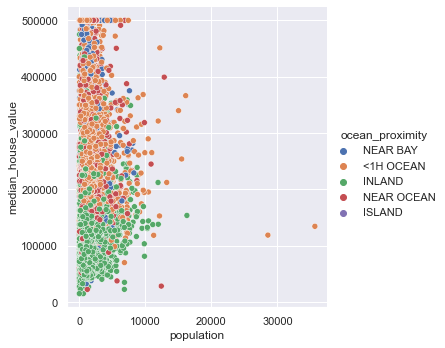

In [138]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.relplot(x = 'population', y = 'median_house_value', hue = 'ocean_proximity', data = data)

### households

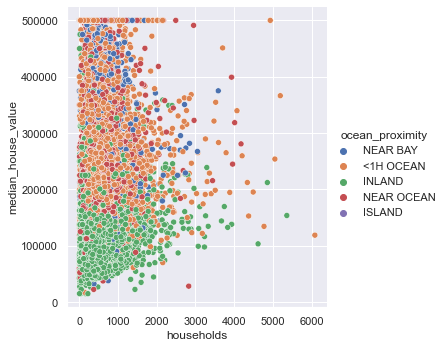

In [139]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.relplot(x = 'households', y = 'median_house_value', hue = 'ocean_proximity', data = data)

### median_income

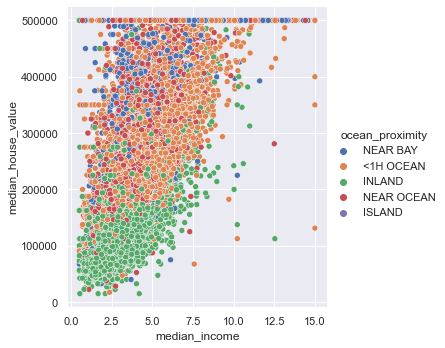

In [85]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.relplot(x = 'median_income', y = 'median_house_value', hue = 'ocean_proximity', data = data)

### ocean_proximity

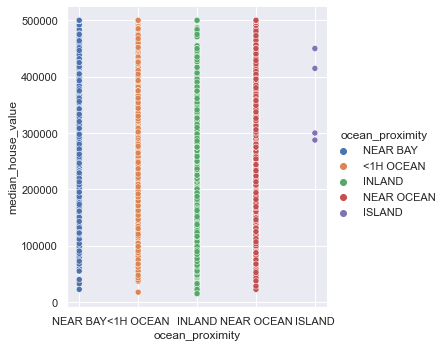

In [84]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.relplot(x = 'ocean_proximity', y = 'median_house_value', hue = 'ocean_proximity', data = data)

### rooms_per_household

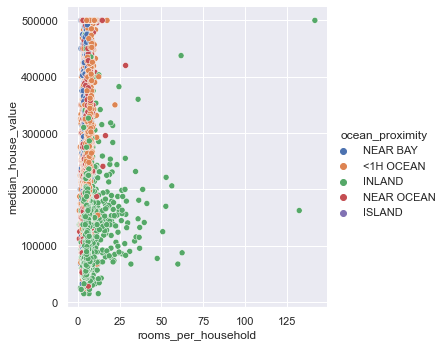

In [140]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.relplot(x = 'rooms_per_household', y = 'median_house_value', hue = 'ocean_proximity', data = data)

### bedrooms_per_room

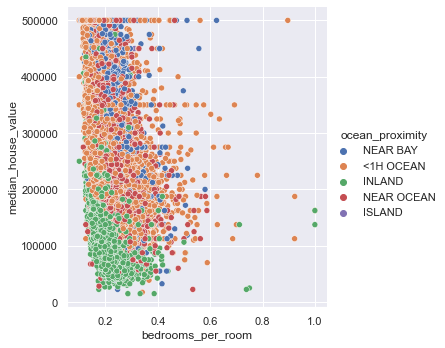

In [141]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.relplot(x = 'bedrooms_per_room', y = 'median_house_value', hue = 'ocean_proximity', data = data)

### population_per_household

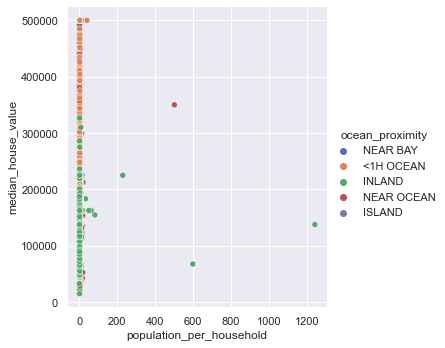

In [142]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.relplot(x = 'population_per_household', y = 'median_house_value', hue = 'ocean_proximity', data = data)

## Histograms 

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>],
       [<AxesSubplot:title={'center':'rooms_per_household'}>,
        <AxesSubplot:title={'center':'bedrooms_per_room'}>,
        <AxesSubplot:title={'center':'population_per_household'}>]],
      dtype=object)

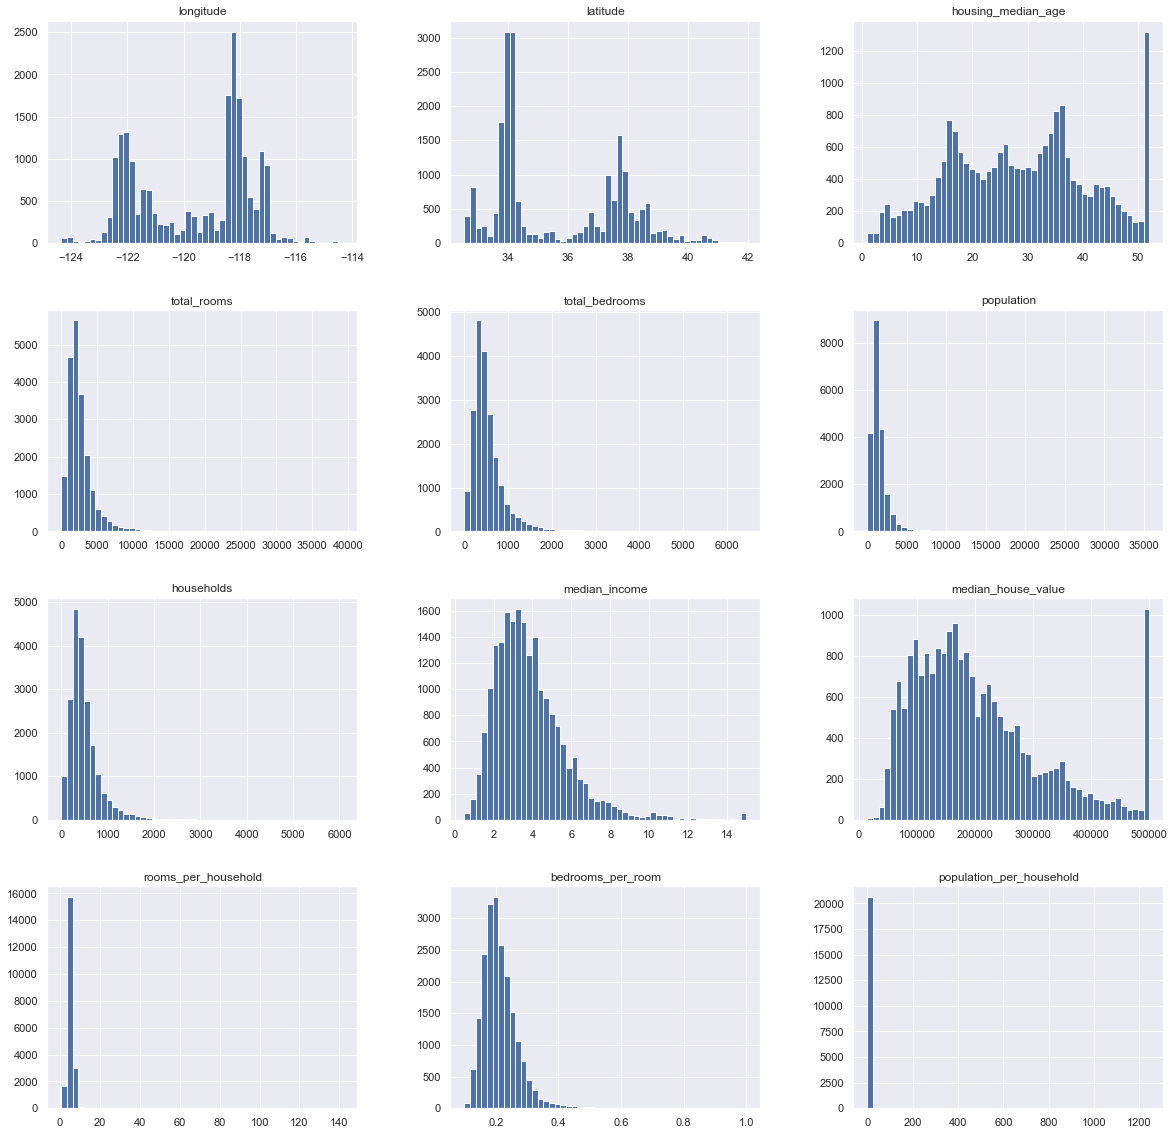

In [75]:
data.hist(bins = 50)


## Scatter Matrix

array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='households', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='longitude'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='longitude'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='longitude'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
 

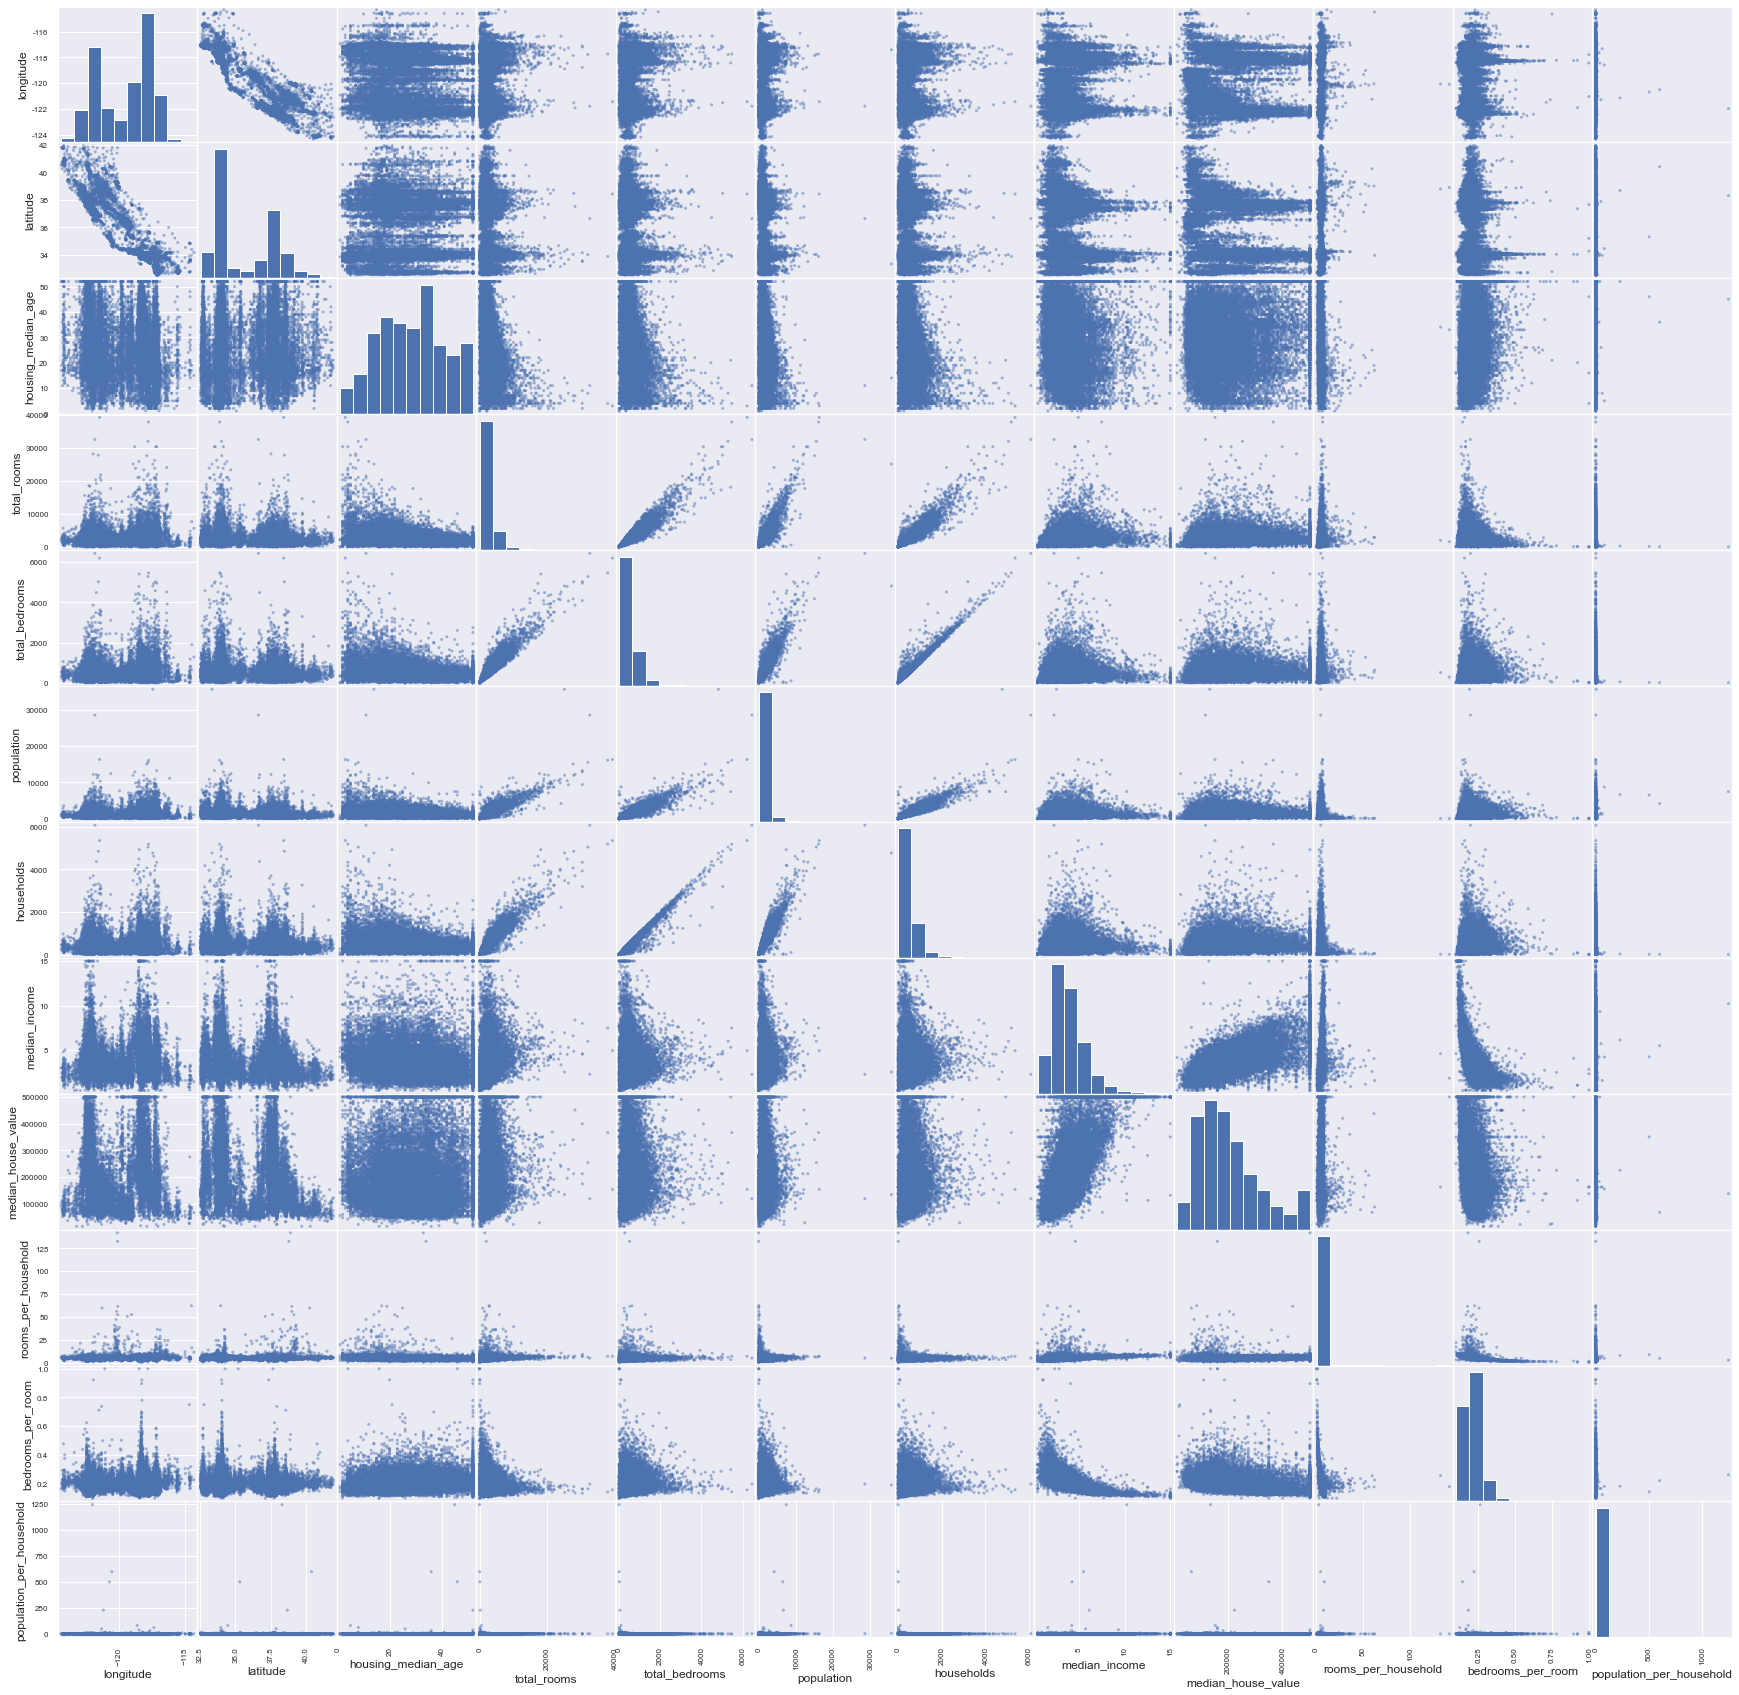

In [98]:
pd.plotting.scatter_matrix(data,figsize = (30,30))

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [154]:
y = data['median_house_value']
x = data.drop('median_house_value', axis = 1)
train = x_train.join(y_train)

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [155]:
L = LinearRegression()
x = train['median_income'].values.reshape(-1,1)
y =train['median_house_value']
L.fit(x,y)
predict = L.predict(x)
error = mean_squared_error(predict, y)
np.sqrt(error)

84070.38550022499

In [157]:
y_pred = L.predict(x_test)

ValueError: could not convert string to float: 'INLAND'

# encoding Variable ocean_proximity 

In [156]:
dummy = pd.get_dummies(train['ocean_proximity'])

### (pending)

In [106]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [107]:
ohe.fit_transform(data[['ocean_proximity']])

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [109]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [114]:
from sklearn.compose import make_column_transformer

In [131]:
ct = make_column_transformer((OneHotEncoder(), ['ocean_proximity']),remainder = 'passthrough')

In [132]:
ct.fit_transform(data)

array([[0.        , 0.        , 0.        , ..., 6.98412698, 0.14659091,
        2.55555556],
       [0.        , 0.        , 0.        , ..., 6.23813708, 0.15579659,
        2.10984183],
       [0.        , 0.        , 0.        , ..., 8.28813559, 0.12951602,
        2.80225989],
       ...,
       [0.        , 1.        , 0.        , ..., 5.20554273, 0.21517303,
        2.3256351 ],
       [0.        , 1.        , 0.        , ..., 5.32951289, 0.21989247,
        2.12320917],
       [0.        , 1.        , 0.        , ..., 5.25471698, 0.22118492,
        2.61698113]])

In [128]:
X = np.array(ct.fit_transform(data))
print(X)

[[0.         0.         0.         ... 6.98412698 0.14659091 2.55555556]
 [0.         0.         0.         ... 6.23813708 0.15579659 2.10984183]
 [0.         0.         0.         ... 8.28813559 0.12951602 2.80225989]
 ...
 [0.         1.         0.         ... 5.20554273 0.21517303 2.3256351 ]
 [0.         1.         0.         ... 5.32951289 0.21989247 2.12320917]
 [0.         1.         0.         ... 5.25471698 0.22118492 2.61698113]]


# Splitting the dataset into the Training set and Test set

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Training the Simple Linear Regression model on the Training set

In [126]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').